In [1]:
import networkx as nx
import json
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

Load networkx graphs

In [2]:
def load_data_from_file(filename):
    with open(filename, "r") as file_handle:
        string_dict = json.load(file_handle)
    return _load_data_from_string_dict(string_dict)

def _load_data_from_string_dict(string_dict):
    result_dict = {}
    for key in string_dict:
        data = copy.deepcopy(string_dict[key])
        if 'edges' in data:
            data["links"] = data.pop("edges")
        graph = nx.node_link_graph(data)
        result_dict[key] = graph
    return result_dict

In [3]:
# dictionary of SMILES and values are graphs
loaddir = "../data/graphs/"
train_data = load_data_from_file(loaddir+"cleaned_graph_data_10June.json") 

Pick out isolated atoms

In [4]:
isolated_atoms = {}

for mol in train_data:
    if len(train_data[mol].nodes)==1:
        isolated_atoms[mol] = train_data[mol]

Lookup table for isolated atoms

In [5]:
# Lookup table for isolated binding energies
iso_be_df = pd.read_csv('../data/lookups/lwnl.csv')

In [6]:
atom_orb_list = []
be_list = []
be_lookup_list = []

for mol in isolated_atoms:
    node = isolated_atoms[mol].nodes[0]
    atom = node['atom_type']
    
    for orb, be in zip(node['orbitals'], node['binding_energies']):
        
        be_lookup = iso_be_df[(iso_be_df['Element']==atom) & (iso_be_df['Orbital']==orb)]['Binding Energy']
        
        if len(be_lookup)>0:
            atom_orb_list.append((atom, orb))
            be_list.append(be)
            be_lookup_list.append(float(be_lookup))
        else:
            print(atom + ',' + orb + ' not in lookup!')
            
be_list = np.array(be_list)
be_lookup_list = np.array(be_lookup_list)
be_diff = np.round(be_list-be_lookup_list, 1)

atom_orb_list = [ao for _, ao in sorted(zip(np.abs(be_diff), atom_orb_list), reverse=True)]
be_list = [be for _, be in sorted(zip(np.abs(be_diff), be_list), reverse=True)]
be_lookup_list = [be_lu for _, be_lu in sorted(zip(np.abs(be_diff), be_lookup_list), reverse=True)]
be_diff = [be_d for _, be_d in sorted(zip(np.abs(be_diff), be_diff), reverse=True)]

Ca,2p3/2 not in lookup!
Ca,2s not in lookup!
Ca,3p3/2 not in lookup!
Cd,3p not in lookup!
Ge,3d not in lookup!
Mg,1s not in lookup!
Mn,2p3/2 not in lookup!
Na,1s not in lookup!
Na,2s not in lookup!
Se,3d not in lookup!
Si,2p not in lookup!
Sr,3d5/2 not in lookup!
Sr,3p3/2 not in lookup!
Sr,4p3/2 not in lookup!


In [7]:
len(atom_orb_list)

52

Text(0, 0.5, '$\\Delta$BE (training-lookup)')

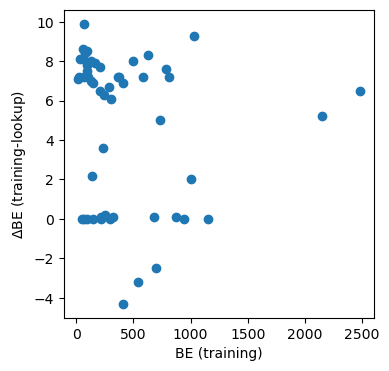

In [8]:
fig, ax = plt.subplots(1, figsize=(4,4))

ax.scatter(be_list, be_diff)

ax.set_xlabel('BE (training)')
ax.set_ylabel(r'$\Delta$BE (training-lookup)')

In [9]:
print('(atom, orb), training, lookup, diff')
print('------------------------------------')

for i in range(10):
    
    ao = atom_orb_list[i]
    be = be_list[i]
    be_lu = be_lookup_list[i]
    be_d = be_diff[i]

    print(ao, be, be_lu, be_d)

(atom, orb), training, lookup, diff
------------------------------------
('Li', '1s') 64.64 54.7 9.9
('Zn', '2p3/2') 1031.1 1021.8 9.3
('I', '4d5/2') 57.5 48.9 8.6
('Ba', '4d5/2') 98.4 89.9 8.5
('Br', '3d5/2') 77.36 69.0 8.4
('I', '3d5/2') 627.59 619.3 8.3
('Sn', '4d5/2') 57.56 49.5 8.1
('Mg', '2p3/2') 31.96 23.9 8.1
('Tl', '4f7/2') 492.91 484.9 8.0
('Sn', '3d5/2') 125.75 117.8 8.0
